In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

df = gpd.read_file('resources\\REGIONE_LOMBARDIA\\analisi_spaziale\\Analisi_spaziale_8classi.shp')

<AxesSubplot:>

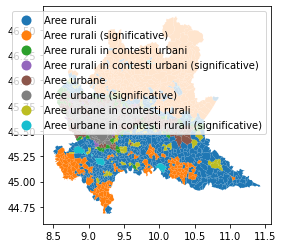

In [6]:
df.to_crs(epsg=4326, inplace=True)
df.plot(column='DESCR_CLAS', legend=True)

In [14]:
import fiona

with fiona.collection('D:\\thesis\\REGIONE_LOMBARDIA\\analisi_spaziale\\Analisi_spaziale_4classi.shp') as source:
    print(source.schema)

{'properties': OrderedDict([('COD_ISTAT', 'float:19.11'), ('NOME_COMUN', 'str:40'), ('DESCR_CLAS', 'str:100'), ('SHAPE_AREA', 'float:19.11'), ('SHAPE_LEN', 'float:19.11')]), 'geometry': 'Polygon'}


In [8]:
df

,COD_ISTAT,NOME_COMUN,DESCR_CLAS,SHAPE_AREA,SHAPE_LEN,geometry
0,108011.0,BRIOSCO,Aree urbane,6.690579e+06,17350.022072,"POLYGON ((9.26926 45.72612, 9.26791 45.72533, ..."
1,97090.0,VIGANO`,Aree urbane,1.599047e+06,6590.536792,"POLYGON ((9.33714 45.71930, 9.33471 45.71779, ..."
2,98041.0,MULAZZANO,Aree rurali,1.553880e+07,29233.101668,"POLYGON ((9.42993 45.33754, 9.42929 45.33844, ..."
3,97021.0,CESANA BRIANZA,Aree urbane,3.445101e+06,13567.023026,"POLYGON ((9.30213 45.82974, 9.30215 45.82903, ..."
4,17109.0,MONIGA DEL GARDA,Aree rurali in contesti urbani,1.585893e+07,23883.668273,"POLYGON ((10.63382 45.53681, 10.63859 45.52002..."
...,...,...,...,...,...,...
1539,98001.0,ABBADIA CERRETO,Aree rurali,6.213359e+06,18580.803285,"POLYGON ((9.60180 45.31781, 9.60160 45.31751, ..."
1540,19029.0,CHIEVE,Aree rurali,6.341670e+06,11749.720146,"POLYGON ((9.60417 45.32570, 9.60394 45.32591, ..."
1541,17004.0,ALFIANELLO,Aree rurali,1.366972e+07,22145.964301,"POLYGON ((10.17587 45.28509, 10.17581 45.28505..."
1542,98006.0,BREMBIO,Aree rurali,1.686556e+07,29171.620019,"POLYGON ((9.59215 45.18984, 9.59213 45.18984, ..."
